In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk("./"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

In [1]:
"""The problem that I am trying to solve, is to predict the price of a home in a certain area. For me, the area which I am trying to solve this for,
is the suburban region of Sammamish, Washington. Through utilizing a variety of different features regarding homes such as price, bedrooms, bathrooms,
square footage, and age, I plan to try to find a relationship between some of these features, and then use a random forest ML model to attempt to predict
the price."""

'The problem that I am trying to solve, is to predict the price of a home in a certain area. For me, the area which I am trying to solve this for,\nis the suburban region of Sammamish, Washington. Through utilizing a variety of different features regarding homes such as price, bedrooms, bathrooms,\nsquare footage, and age, I plan to try to find a relationship between some of these features, and then use a random forest ML model to attempt to predict\nthe price.'

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

df = pd.read_csv("/home/jupyter-1000790/Project_2/data/Sammamish Data.csv")


"""The data was gathered through the usage of a data scraper for the Zillow website (Apify). It was found online, and it allowed me to choose which 
features could appear from the scraper. This includes ofthe number of beds, bathrooms, square footage, and age, which were available. The data scraper 
was ran once, and gave 1800 rows of data for homes in the Sammamish area for analysis and prediction of home value."""

'The data was gathered through the usage of a data scraper for the Zillow website (Apify). It was found online, and it allowed me to choose which \nfeatures could appear from the scraper. This includes ofthe number of beds, bathrooms, square footage, and age, which were available. The data scraper \nwas ran once, and gave 1800 rows of data for homes in the Sammamish area for analysis and prediction of home value.'

# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

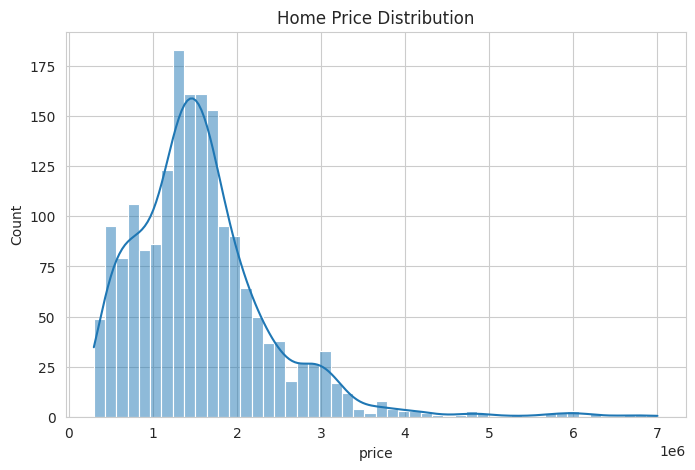

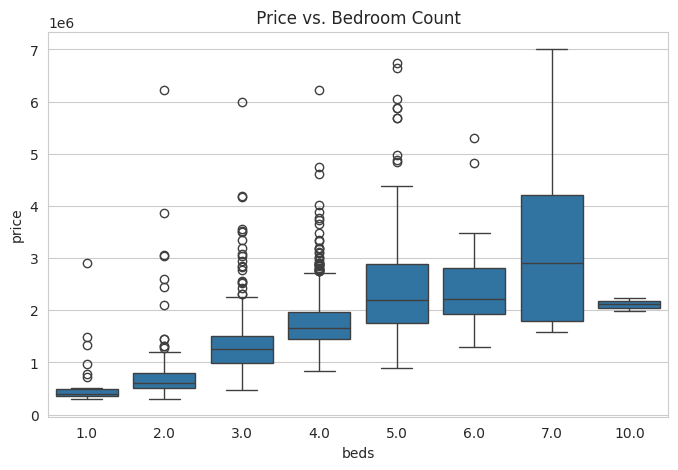

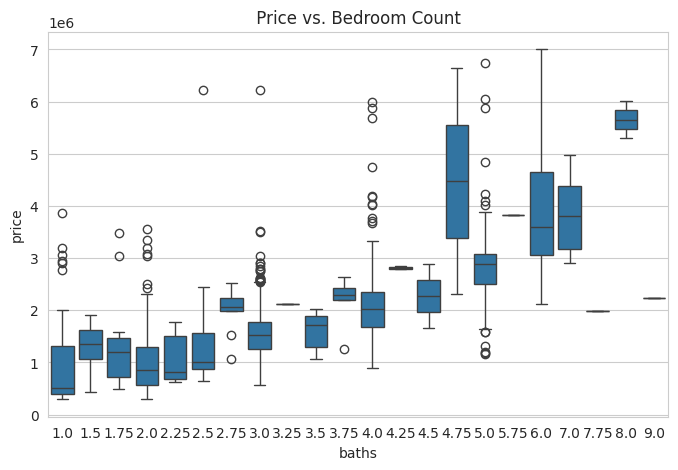

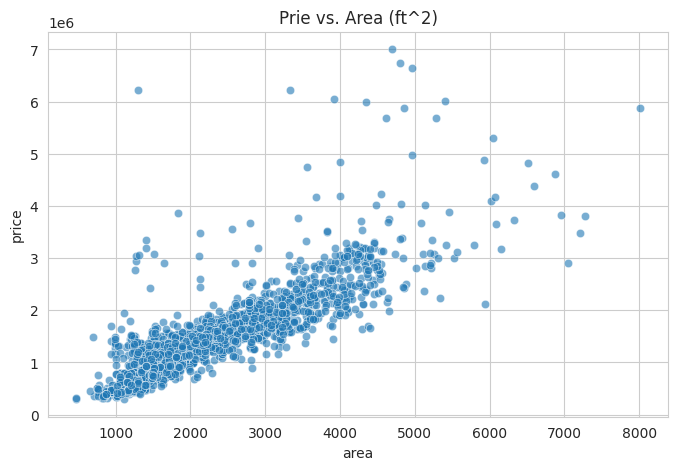

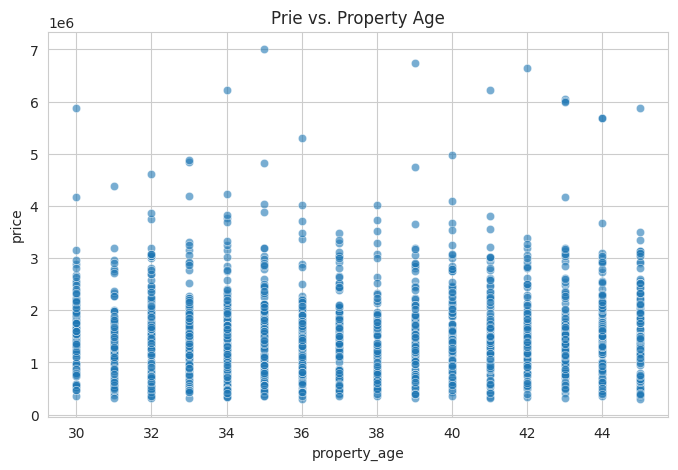

In [19]:
""" The data.... """


plt.figure(figsize=(8,5))
sns.histplot(x='price', data = df, bins=50, kde=True)
plt.title("Home Price Distribution")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='beds', y='price', data=df)
plt.title(" Price vs. Bedroom Count ")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='baths', y='price', data=df)
plt.title(" Price vs. Bedroom Count ")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='area', y='price', data=df, alpha = 0.6)
plt.title("Prie vs. Area (ft^2)")
plt.show()

plt.figure(figsize=(8,5))
sns.scatterplot(x='property_age', y='price', data=df,alpha = 0.6)
plt.title("Prie vs. Property Age")
plt.show()


# 4.Prepare the Data


Apply any data transformations and explain what and why


# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with


# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 


# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 


In [ ]:
def infrence(prams):
    results = m.run(prams)
    return results 